In [49]:
# IN this notebook, we will implement logistic regression using gradient descent


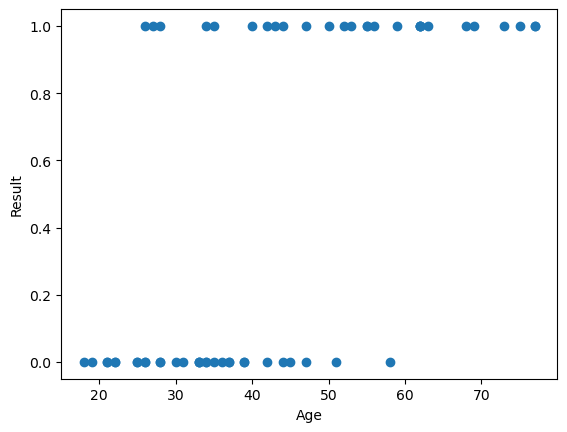

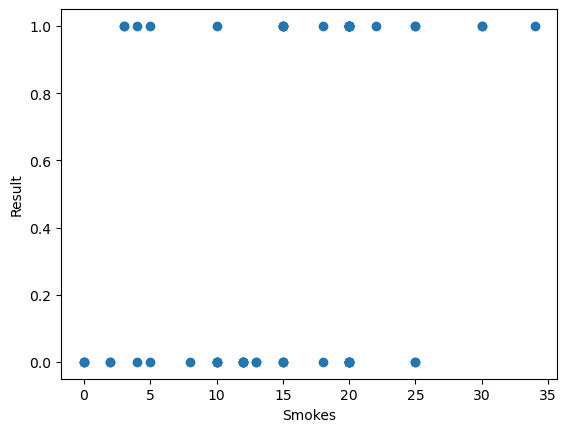

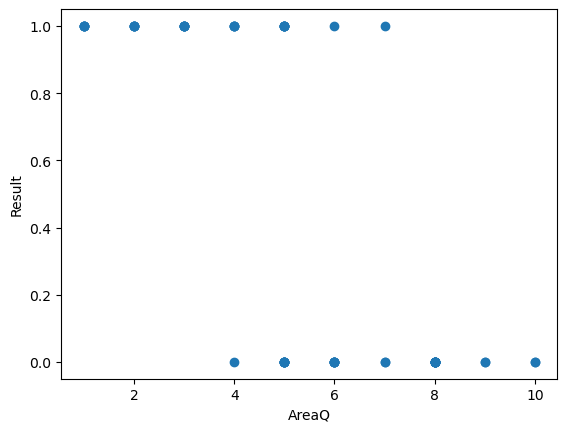

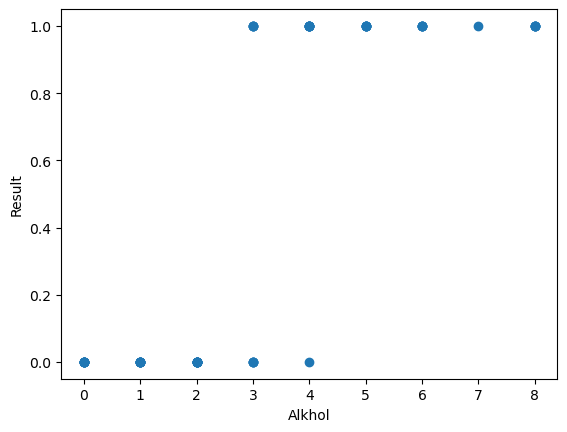

In [70]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


dataset = pd.read_csv('lung_cancer_examples.csv')
dataset = dataset.drop(["Name","Surname"], axis = 1)

X = dataset.drop("Result", axis = 1)
X = np.c_[np.ones(X.shape[0]), X]
y = dataset["Result"]


X_scaled = X/X.max(axis=0)
#Preliminary data analysis

#Plotting the data
plt.scatter(X[:,1], y)
plt.xlabel("Age")
plt.ylabel("Result")
plt.show()

plt.scatter(X[:,2], y)
plt.xlabel("Smokes")
plt.ylabel("Result")
plt.show()

plt.scatter(X[:,3], y)
plt.xlabel("AreaQ")
plt.ylabel("Result")
plt.show()

plt.scatter(X[:,4], y)
plt.xlabel("Alkhol")
plt.ylabel("Result")
plt.show()








In [71]:
#Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Define the cost function for logistic regression
def cost_function(X, y, theta):
    m = y.size
    h = sigmoid(X.dot(theta))
    J = (-1/m) * (y.dot(np.log(h)) + (1 - y).dot(np.log(1 - h)))
    if np.isnan(J):
        return np.inf
    return J

In [72]:
# Define the gradient descent function
def gradient_descent(X, y, theta, alpha, num_iters):
    m = y.size
    J_history = np.zeros(num_iters)
    for i in range(num_iters):
        h = sigmoid(X.dot(theta))
        theta = theta - (alpha/m) * (X.T.dot(h - y))
        J_history[i] = cost_function(X, y, theta)
    return theta, J_history




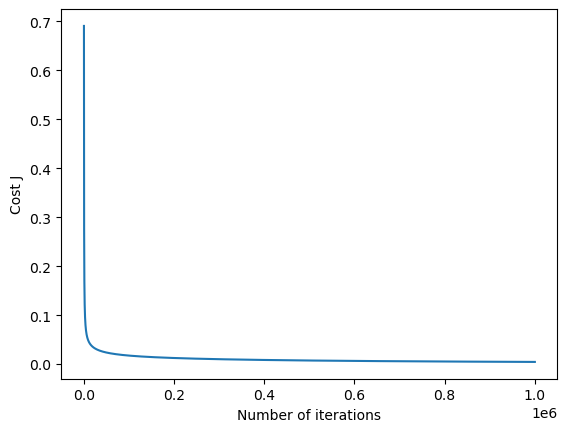

0.004483661014921206
1.0


In [65]:
#Initialize theta parameters
theta = np.zeros(X.shape[1])

#Set hyperparameters
alpha = 0.1
num_iters = 1000000

#Run gradient descent
theta, J_history = gradient_descent(X_scaled, y, theta, alpha, num_iters)

#Plot the convergence graph
plt.plot(range(J_history.size), J_history)
plt.xlabel("Number of iterations")
plt.ylabel("Cost J")
plt.show()

#print cost
print(cost_function(X_scaled, y, theta))


#Display theta

#try to predict the result for a 23 year old person who smokes 0, has an areaQ of 0.9 and drinks 0 glasses of alcohol a day
print(sigmoid(np.dot([1, 23, 0, 0.9, 0], theta)))

In [77]:
#try to predict the result for a 23 year old person who smokes 0, has an areaQ of 0.9 and drinks 0 glasses of alcohol a day
print(sigmoid(np.dot([1, 0.9, 0.1, 0.9, 0.1], theta)))

0.05370510635824832
